# [Binary Tree Python](https://github.com/dashidhy/algorithm-pattern-python/blob/master/data_structure/binary_tree.md)

In [2]:
import IPython; IPython.display.HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.nbinput').show(); } else { $('div.nbinput').hide(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## [104. Maximum Depth of Binary Tree](https://leetcode.com/problems/maximum-depth-of-binary-tree/)

Easy

Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

Example 1:

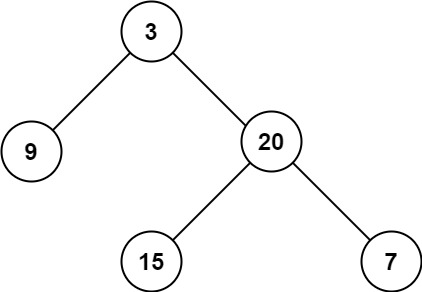

    Input: root = [3,9,20,null,null,15,7]
    Output: 3

Constraints:

    The number of nodes in the tree is in the range [0, 10^4].
    -100 <= Node.val <= 100


In [ ]:
def maxDepth(root):
    if root:
        return 1 + max(maxDepth(root.left), maxDepth(root.right))
    else:
        return 0

## [110. Balanced Binary Tree](https://leetcode.com/problems/balanced-binary-tree/)

Easy

Given a binary tree, determine if it is height-balanced.

For this problem, a height-balanced binary tree is defined as:

    a binary tree in which the left and right subtrees of every node differ in height by no more than 1.

Example 1:

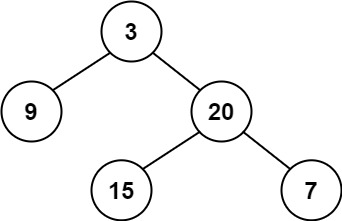

    Input: root = [3,9,20,null,null,15,7]
    Output: true
 
Constraints:

    The number of nodes in the tree is in the range [0, 5000].
    -10^4 <= Node.val <= 10^4



In [3]:
# 遞迴的過程中需要傳其它資訊（子樹深度）。寫一個遞迴函數 depth_balance 輸出完整資訊，但最後 isBalanced 只回傳需要的部份

def isBalanced(root):
    def depth_balance(root):
        '''return (depth, isBalanced)'''
        if root:
            depth_l, balanced_l = depth_balance(root.left)
            depth_r, balanced_r = depth_balance(root.right)

            return 1 + max(depth_l, depth_r), balanced_l and balanced_r and abs(depth_l - depth_r) < 2
        else:
            return 0, True

    return depth_balance(root)[1]

## [124. Binary Tree Maximum Path Sum](https://leetcode.com/problems/binary-tree-maximum-path-sum/)

Hard

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any path.

 
Example 2:

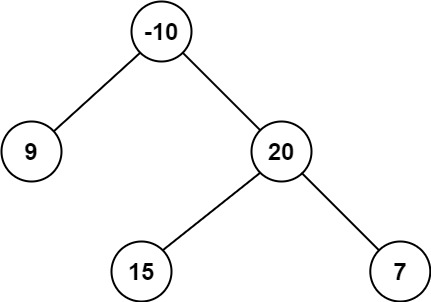

    Input: root = [-10,9,20,null,null,15,7]
    Output: 42
    Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

Constraints:

    The number of nodes in the tree is in the range [1, 3*10^4].
    -1000 <= Node.val <= 1000



In [ ]:
# rsum 本身一定要出現在 mps return 的 max 裡不然 [0] 不會過

import math

def maxPathSum(root):
    def mps(root):
        '''
        return two sums: 

        1. the max path sum
        2. the restricted max path sum where one end of the path is the root
        '''
        if root:
            sum_l, rsum_l = mps(root.left)
            sum_r, rsum_r = mps(root.right)
            rsum = max(root.val, root.val + rsum_l, root.val + rsum_r)

            return max(sum_l, sum_r, rsum, root.val + rsum_l + rsum_r), rsum
        else:
            return -math.inf, -math.inf

    return mps(root)[0]

## [236. Lowest Common Ancestor of a Binary Tree](https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-tree/)

Medium

Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

Example 2:

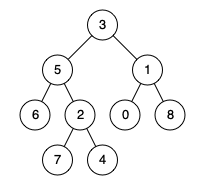

    Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 4
    Output: 5
    Explanation: The LCA of nodes 5 and 4 is 5, since a node can be a descendant of itself according to the LCA definition.

Constraints:

    The number of nodes in the tree is in the range [2, 10^5].
    -10^9 <= Node.val <= 10^9
    All Node.val are unique.
    p != q
    p and q will exist in the tree.

In [ ]:
# DFS, LeetCode 上最快解答

def lowestCommonAncestor(root, p, q):
    if not root:
        return None

    left = lowestCommonAncestor(root.left, p, q)
    right = lowestCommonAncestor(root.right, p, q)

    if root == p or root == q:
        return root
    elif left and right:
        return root
    elif left:
        return left
    else:
        return right

## [102. Binary Tree Level Order Traversal](https://leetcode.com/problems/binary-tree-level-order-traversal/)

Medium

Given the root of a binary tree, return the level order traversal of its nodes' values. (i.e., from left to right, level by level).


Example 1:

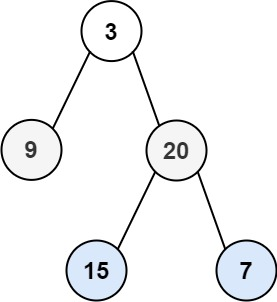

    Input: root = [3,9,20,null,null,15,7]
    Output: [[3],[9,20],[15,7]] 

Constraints:

    The number of nodes in the tree is in the range [0, 2000].
    -1000 <= Node.val <= 1000



In [ ]:
# BFS

from collections import deque

def levelOrder(root):
    q = deque()
    res = []

    if root:
        q.append(root)

    while q:
        level = []
        for _ in range(len(q)):
            root = q.popleft()
            level.append(root.val)
            if root.left:
                q.append(root.left)
            if root.right:
                q.append(root.right)

        res.append(level)
    return res

-   [binary-tree-level-order-traversal-ii](https://leetcode.com/problems/binary-tree-level-order-traversal-ii/)
-   [binary-tree-zigzag-level-order-traversal](https://leetcode.com/problems/binary-tree-zigzag-level-order-traversal/)
-   [validate-binary-search-tree](https://leetcode.com/problems/validate-binary-search-tree/)
-   [insert-into-a-binary-search-tree](https://leetcode.com/problems/insert-into-a-binary-search-tree/)